In [1]:
import numpy as np
import galsim
import ngmix
import proplot as plot
import json

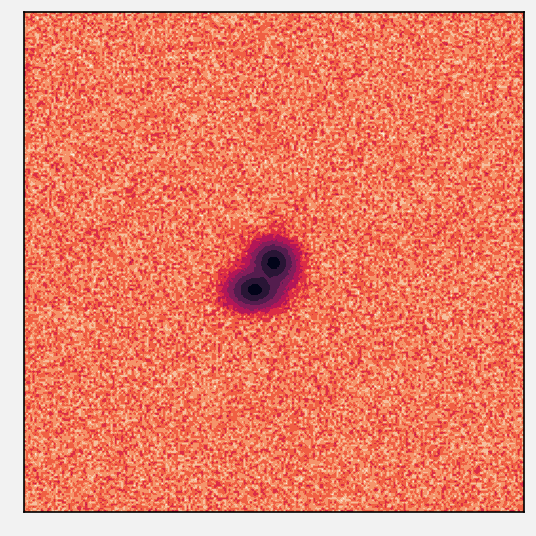

In [2]:
from blend_code import run_sim, make_objs

top = True
blend = True

rng = np.random.RandomState(seed=3453425342)
im = make_objs(rng=rng, blend=blend, shear=0.2, top=top)[0]
fig, axs = plot.subplots()

cut = 7
axs.imshow(np.arcsinh(im[cut:-cut, cut:-cut]), cmap='rocket_r')
axs.format(grid=False, xticks=[], yticks=[])

In [3]:
top = False

In [4]:
with open(f"data_blendTrue_shear0.02_top{top}.json", "r") as fp:
    datap = json.load(fp)
    
with open(f"data_blendTrue_shear-0.02_top{top}.json", "r") as fp:
    datam = json.load(fp)

Rblend = (np.array(datap['g1'])/np.array(datap['R11']) - np.array(datam['g1'])/np.array(datam['R11']))/0.04
print(Rblend)

[1.10905794 0.10379598]


In [5]:
with open(f"data_blendFalse_shear0.02_top{top}.json", "r") as fp:
    datap = json.load(fp)
    
with open(f"data_blendFalse_shear-0.02_top{top}.json", "r") as fp:
    datam = json.load(fp)

R = (np.array(datap['g1'])/np.array(datap['R11']) - np.array(datam['g1'])/np.array(datam['R11']))/0.04
print(R)

[1.00051669e+00 2.11329639e-09]


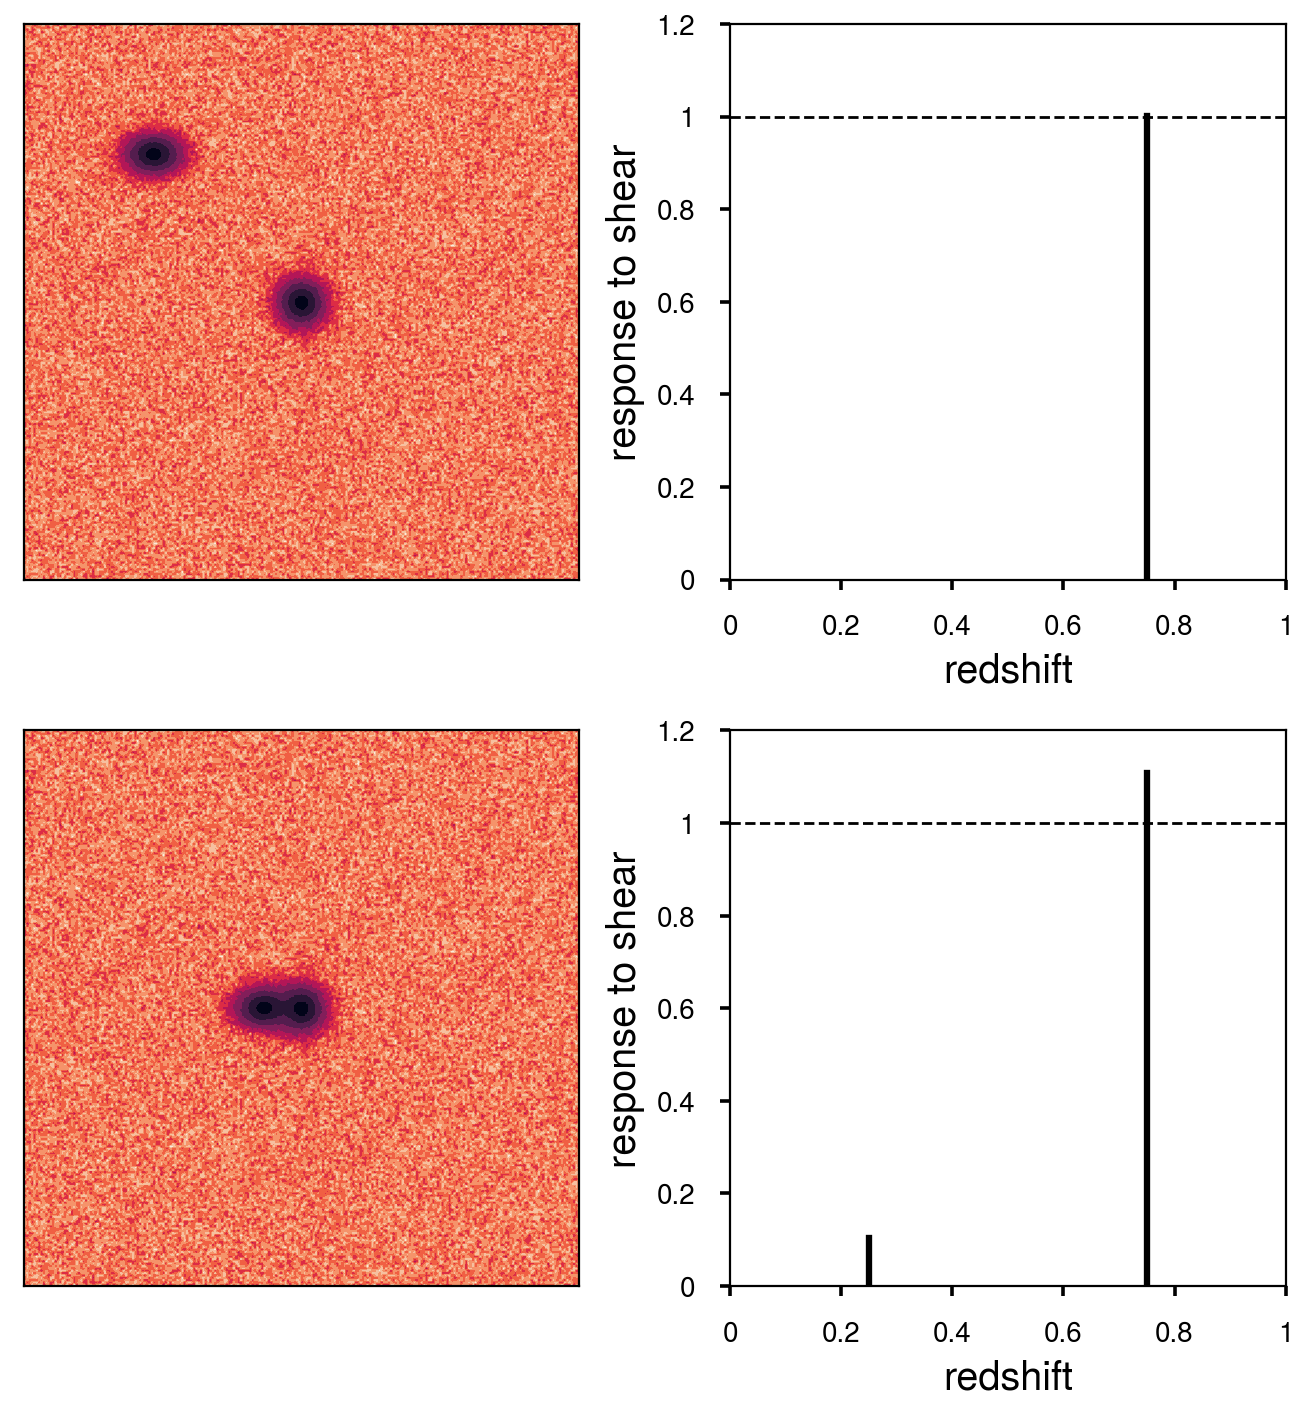

In [9]:
plot.rc.style = 'seaborn-talk'

fig, axs = plot.subplots(nrows=2, ncols=2, sharex=0, sharey=0)

ax = axs[0, 0]
rng = np.random.RandomState(seed=3453425342)
im = make_objs(rng=rng, blend=False, shear=0.2, top=top)[0]

cut = 7
ax.imshow(np.arcsinh(im[cut:-cut, cut:-cut]), cmap='rocket_r')
ax.format(grid=False, xticks=[], yticks=[])

ax = axs[1, 0]
rng = np.random.RandomState(seed=3453425342)
im = make_objs(rng=rng, blend=True, shear=0.2, top=top)[0]

cut = 7
ax.imshow(np.arcsinh(im[cut:-cut, cut:-cut]), cmap='rocket_r')
ax.format(grid=False, xticks=[], yticks=[])

ax = axs[0, 1]
ax.plot([0.75, 0.75], [0, R[0]], color='k')
ax.plot([0, 1], [1, 1], color='k', linestyle='dashed', lw=1)
ax.format(xlim=[0, 1], ylim=[0, 1.2], xlabel='redshift', ylabel='response to shear')

ax = axs[1, 1]
ax.plot([0.75, 0.75], [0, Rblend[0]], color='k')
ax.plot([0.25, 0.25], [0, Rblend[1]], color='k')
ax.plot([0, 1], [1, 1], color='k', linestyle='dashed', lw=1)
ax.format(xlim=[0, 1], ylim=[0, 1.2], xlabel='redshift', ylabel='response to shear')

In [10]:
fig.save("blendexample.pdf")